<a href="https://colab.research.google.com/github/hyunseo-hy/Python-for-Finance-Practice/blob/main/Black_Scholes_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [151]:
# @title time_to_maturity(t0, T, y=252)

def time_to_maturity(t0, T, y=252):
  t0 = pd.to_datetime(t0).date() # np.busday_count가 D단위만 입력으로 받아서 시간부분을 잘라줘야함
  T = pd.to_datetime(T).date()
  return (np.busday_count(t0,T)/y)
time_to_maturity('2026-01-01','2026-02-23')

np.float64(0.14682539682539683)

In [152]:
# @title call_pr(S,K, ttm, r, sigma)

def call_pr(S,K, ttm, r, sigma):
  d1 = (np.log(S/K) + (r+sigma**2*0.5*ttm))/(sigma*np.sqrt(ttm))
  d2 = d1 - sigma*np.sqrt(ttm)
  val = (S*stats.norm.cdf(d1,0.0,1.0)) - K*np.exp(-r*ttm)*stats.norm.cdf(d2,0.0,1.0)
  return val

ttm = time_to_maturity('2026-01-01','2026-02-23')
r = 0.025
sigma = 0.15
call_pr(350,350,ttm,r,sigma)

np.float64(8.143706446419856)

In [153]:
# @title 반복문 call_table

call_space = dict()
K = np.arange(250,350,10)
S = np.arange(200,400,10)

for k in K:
  single_space=dict()
  for s in S:
    single_space[s] = call_pr(s,k,ttm,r,sigma)
  call_space[k] = pd.Series(single_space)
call_table = pd.DataFrame(call_space)
call_table

,250,260,270,280,290,300,310,320,330,340
200,-0.000423,-0.000036,-0.000002,-8.023312e-08,-2.420781e-09,-5.728583e-11,-1.096422e-12,-1.741327e-14,-2.345681e-16,-2.731441e-18
210,-0.003501,-0.000739,-0.000080,-5.740544e-06,-2.976125e-07,-1.176366e-08,-3.679007e-10,-9.372934e-12,-1.992782e-13,-3.609240e-15
220,0.013665,-0.004225,-0.001190,-1.612288e-04,-1.445546e-05,-9.459480e-07,-4.762703e-08,-1.912838e-09,-6.301441e-11,-1.742051e-12
230,0.321484,0.024801,-0.004630,-1.782990e-03,-2.972432e-04,-3.265606e-05,-2.635879e-06,-1.650181e-07,-8.303120e-09,-3.449136e-10
240,1.840892,0.393950,0.039661,-4.466283e-03,-2.506672e-03,-5.081590e-04,-6.720918e-05,-6.560622e-06,-5.001847e-07,-3.086045e-08
250,5.816933,2.019487,0.473655,5.863212e-02,-3.454453e-03,-3.324006e-03,-8.134153e-04,-1.276165e-04,-1.481219e-05,-1.350673e-06
260,12.601470,6.049611,2.201768,5.603339e-01,8.203845e-02,-1.291793e-03,-4.170188e-03,-1.228717e-03,-2.259031e-04,-3.072592e-05
270,21.353387,12.788454,6.282288,2.387386e+00,6.536987e-01,1.101385e-01,2.334117e-03,-4.951805e-03,-1.762604e-03,-3.760343e-04
280,31.001758,21.462356,12.978323,6.514965e+00,2.576034e+00,7.534478e-01,1.431293e-01,7.735340e-03,-5.548078e-03,-2.413176e-03
290,40.928839,31.061793,21.576553,1.317083e+01,6.747642e+00,2.767441e+00,8.592754e-01,1.811519e-01,1.521479e-02,-5.813710e-03


In [154]:
# @title 브로드캐스트 call_table

ttm = time_to_maturity('2026-01-01','2026-02-23')
r = 0.025
sigma = 0.15

K = np.arange(250,350,10).reshape(1,int((350-250)/10))
S = np.arange(200,400,10).reshape(int((400-200)/10),1)

value = call_pr(S,K,ttm,r,sigma)

df_c = pd.DataFrame(value,
                    index = S.ravel(),
                    columns = K.ravel())
df_c

,250,260,270,280,290,300,310,320,330,340
200,-0.000423,-0.000036,-0.000002,-8.023312e-08,-2.420781e-09,-5.728583e-11,-1.096422e-12,-1.741327e-14,-2.345681e-16,-2.731441e-18
210,-0.003501,-0.000739,-0.000080,-5.740544e-06,-2.976125e-07,-1.176366e-08,-3.679007e-10,-9.372934e-12,-1.992782e-13,-3.609240e-15
220,0.013665,-0.004225,-0.001190,-1.612288e-04,-1.445546e-05,-9.459480e-07,-4.762703e-08,-1.912838e-09,-6.301441e-11,-1.742051e-12
230,0.321484,0.024801,-0.004630,-1.782990e-03,-2.972432e-04,-3.265606e-05,-2.635879e-06,-1.650181e-07,-8.303120e-09,-3.449136e-10
240,1.840892,0.393950,0.039661,-4.466283e-03,-2.506672e-03,-5.081590e-04,-6.720918e-05,-6.560622e-06,-5.001847e-07,-3.086045e-08
250,5.816933,2.019487,0.473655,5.863212e-02,-3.454453e-03,-3.324006e-03,-8.134153e-04,-1.276165e-04,-1.481219e-05,-1.350673e-06
260,12.601470,6.049611,2.201768,5.603339e-01,8.203845e-02,-1.291793e-03,-4.170188e-03,-1.228717e-03,-2.259031e-04,-3.072592e-05
270,21.353387,12.788454,6.282288,2.387386e+00,6.536987e-01,1.101385e-01,2.334117e-03,-4.951805e-03,-1.762604e-03,-3.760343e-04
280,31.001758,21.462356,12.978323,6.514965e+00,2.576034e+00,7.534478e-01,1.431293e-01,7.735340e-03,-5.548078e-03,-2.413176e-03
290,40.928839,31.061793,21.576553,1.317083e+01,6.747642e+00,2.767441e+00,8.592754e-01,1.811519e-01,1.521479e-02,-5.813710e-03


In [155]:
# @title graph settings

plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

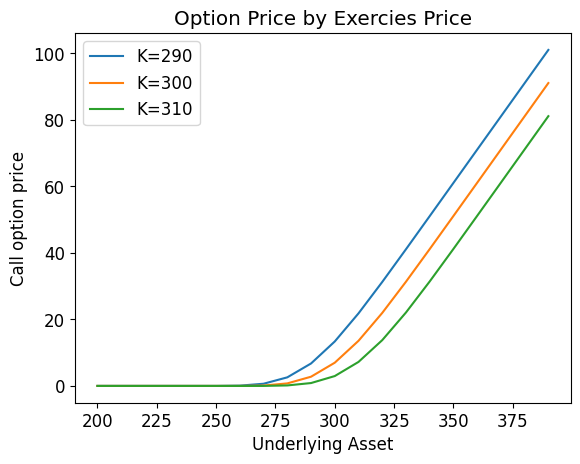

In [156]:
# @title call_option graph 2d

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df_c[290], label = "K=290")
ax.plot(df_c[300], label = "K=300")
ax.plot(df_c[310], label = "K=310")

ax.set_xlabel("Underlying Asset")
ax.set_ylabel("Call option price")
ax.set_title("Option Price by Exercies Price")
ax.legend(loc="best")

In [157]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

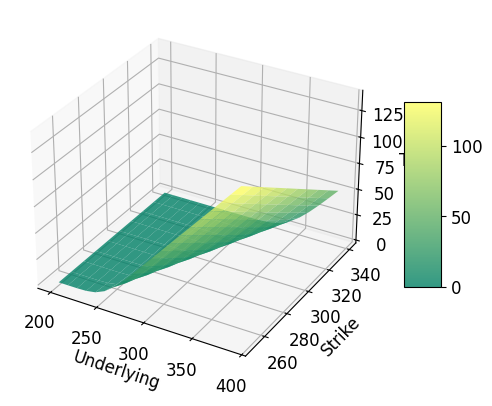

In [158]:
# @title call option graph

ttm = time_to_maturity('2026-01-01','2026-02-23')
r = 0.025
sigma = 0.15

K = np.arange(250,350,10).reshape(1,int((350-250)/10))
S = np.arange(200,400,10).reshape(int((400-200)/10),1)

value = call_pr(S,K,ttm,r,sigma)

df_c = pd.DataFrame(value,
                    index = S.ravel(),
                    columns = K.ravel())
df_c

fig = plt.figure()
ax_3d = fig.add_subplot(111, projection = "3d")

surf = ax_3d.plot_surface(S,K,df_c, cmap=cm.summer,
                          linewidth=1, antialiased = True, alpha = 0.8)

ax_3d.set_xlabel("Underlying")
ax_3d.set_ylabel("Strike")
ax_3d.set_zlabel("Test")

fig.colorbar(surf, shrink=0.5, aspect=5)

In [159]:
# @title put_pr(S,K, ttm, r, sigma)

def put_pr(S,K, ttm, r, sigma):
  d1 = (np.log(S/K) + (r+sigma**2*0.5*ttm))/(sigma*np.sqrt(ttm))
  d2 = d1 - sigma*np.sqrt(ttm)
  val = - (S*stats.norm.cdf(-d1,0.0,1.0)) + K*np.exp(-r*ttm)*stats.norm.cdf(-d2,0.0,1.0)
  return val

ttm = time_to_maturity('2026-01-01','2026-02-23')
r = 0.025
sigma = 0.15
put_pr(350,350,ttm,r,sigma)

np.float64(6.861339215005401)

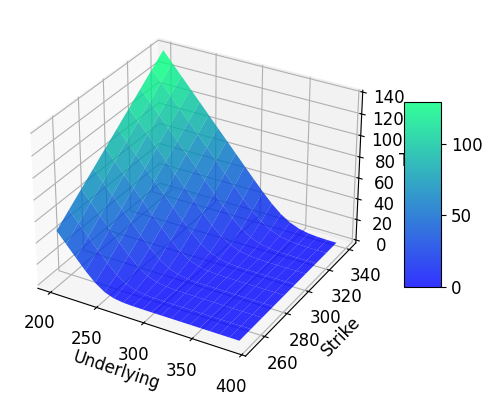

In [160]:
# @title Put option graph
ttm = time_to_maturity('2026-01-01','2026-02-23')
r = 0.025
sigma = 0.15

K = np.arange(250,350,10).reshape(1,int((350-250)/10))
S = np.arange(200,400,10).reshape(int((400-200)/10),1)

value = put_pr(S,K,ttm,r,sigma)

df_p = pd.DataFrame(value,
                    index = S.ravel(),
                    columns = K.ravel())
df_p

fig = plt.figure()
ax_3d = fig.add_subplot(111, projection = "3d")

surf = ax_3d.plot_surface(S,K,df_p, cmap=cm.winter,
                          linewidth=1, antialiased = True, alpha = 0.8)

ax_3d.set_xlabel("Underlying")
ax_3d.set_ylabel("Strike")
ax_3d.set_zlabel("Test")

fig.colorbar(surf, shrink=0.5, aspect=5)

In [161]:
# @title call_delta(S,K,ttm,r,sigma)

def call_delta(S,K,ttm,r,sigma):
  d1 = (np.log(S/K) + (r+sigma**2*0.5*ttm))/(sigma*np.sqrt(ttm))
  val = stats.norm.cdf(d1,0.0,1.0)
  return val

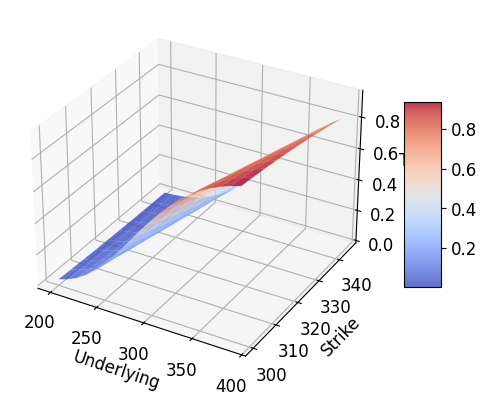

In [162]:
# @title call delta graph

K = np.arange(300,350,5) #브로드캐스트를 위해 2차원 배열로 변환
S = np.arange(200,400,10)
K,S = np.meshgrid(K,S)

df_delta = call_delta(S,K,0.38,0.02,0.30)

# K와 S의 크기가 동일하다면 df = function(K,S) 로 바로 연산 가능함

fig = plt.figure()
ax_3d = fig.add_subplot(111, projection = "3d")

surf = ax_3d.plot_surface(S,K,df_delta, cmap=cm.coolwarm,
                          linewidth=1, antialiased = True, alpha = 0.8)

ax_3d.set_xlabel("Underlying")
ax_3d.set_ylabel("Strike")
ax_3d.set_zlabel("Test")

fig.colorbar(surf, shrink=0.5, aspect=5)

In [163]:
def ndx(x):
  return (np.exp(-1*x**2*0.5)) / np.sqrt(2*np.pi)

In [164]:
# @title call_gamma(S,K,ttm,r,sigma)

def call_gamma(S,K,ttm,r,sigma):
  d1 = (np.log(S/K) + (r+sigma**2*0.5*ttm))/(sigma*np.sqrt(ttm))
  val = (ndx(d1)) / (S*sigma*np.sqrt(ttm))
  return val

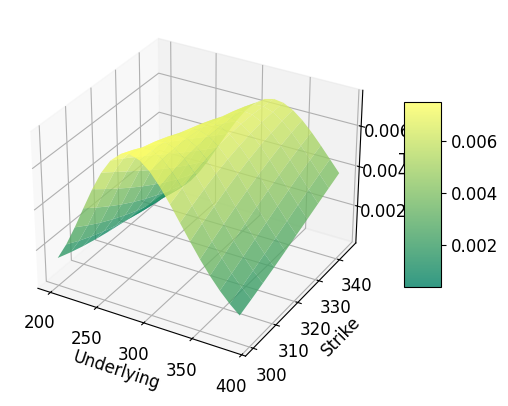

In [165]:
# @title call gamma graph

K = np.arange(300,350,5) #브로드캐스트를 위해 2차원 배열로 변환
S = np.arange(200,400,10)
K,S = np.meshgrid(K,S)

df = call_gamma(S,K,0.38,0.02,0.30)

# K와 S의 크기가 동일하다면 df = function(K,S) 로 바로 연산 가능함

fig = plt.figure()
ax_3d = fig.add_subplot(111, projection = "3d")

surf = ax_3d.plot_surface(S,K,df, cmap=cm.summer,
                          linewidth=1, antialiased = True, alpha = 0.8)

ax_3d.set_xlabel("Underlying")
ax_3d.set_ylabel("Strike")
ax_3d.set_zlabel("Test")

fig.colorbar(surf, shrink=0.5, aspect=5)

In [166]:
# @title call_theta

def call_theta(S, K, ttm, r, sigma):

    d1 = (np.log(S / K) + (r + sigma**2 * 0.5) * ttm) / (sigma * np.sqrt(ttm))
    d2 = (np.log(S / K) + (r - sigma**2 * 0.5) * ttm) / (sigma * np.sqrt(ttm))

    val = (-1 * (S * ndx(d1) * sigma) / (2 * np.sqrt(ttm))) \
          - (r * K * np.exp(-r * ttm) * stats.norm.cdf(d2, 0.0, 1.0))
    return val

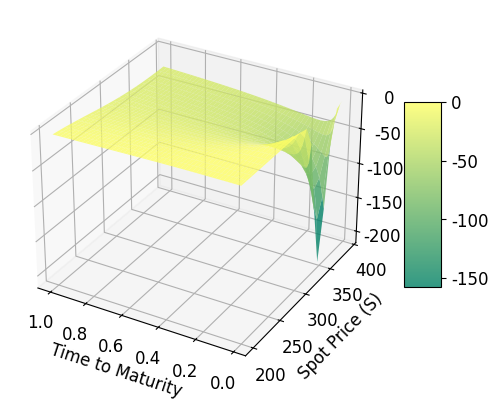

In [167]:
# @title theta graph
T = np.arange(1.0, 0.0, -0.01)
S = np.arange(200, 400, 10)
T, S = np.meshgrid(T, S)

df = call_theta(S, 350, T, 0.02, 0.30)

fig = plt.figure()
ax_3d = fig.add_subplot(111, projection="3d")

surf = ax_3d.plot_surface(T, S, df, cmap=cm.summer,
                           linewidth=1, antialiased=True, alpha=0.8)

ax_3d.invert_xaxis()
ax_3d.set_xlabel("Time to Maturity")
ax_3d.set_ylabel("Spot Price (S)")   # ✅ 수정
ax_3d.set_zlabel("Theta")            # ✅ 수정

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [168]:
# @title call_vega

def call_vega(S, K, ttm, r, sigma):

    d1 = (np.log(S / K) + (r + sigma**2 * 0.5) * ttm) / (sigma * np.sqrt(ttm))
    d2 = (np.log(S / K) + (r - sigma**2 * 0.5) * ttm) / (sigma * np.sqrt(ttm))
    val = (S*np.sqrt(ttm)*ndx(d1))
    return val

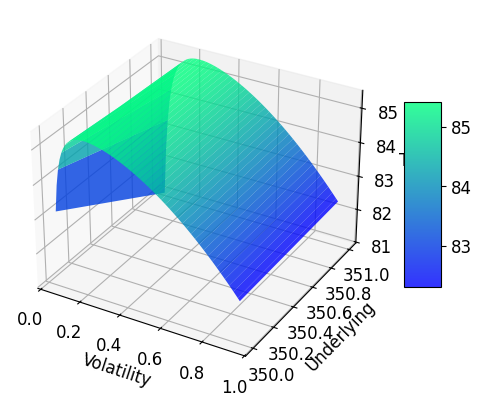

In [174]:
# @title call_vega graph

V = np.arange(0.05,0.95,0.01) #브로드캐스트를 위해 2차원 배열로 변환
S = np.arange(350,352)
V,S = np.meshgrid(V,S)
df = call_vega(S,350,0.38,0.02,V)

fig = plt.figure()
ax_3d = fig.add_subplot(111, projection = "3d")

surf = ax_3d.plot_surface(V,S,df, cmap=cm.winter,
                          linewidth=1, antialiased = True, alpha = 0.8)

ax_3d.set_xlabel("Volatility")
ax_3d.set_ylabel("Underlying")
ax_3d.set_zlabel("Test")

fig.colorbar(surf, shrink=0.5, aspect=5)